In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions = [
    ["Sixth Sense", "LOTR1", "Harry Potter1", "Green Mile", "LOTR2"],
    ["Gladiator", "Patriot", "Braveheart"],
    ["LOTR1", "LOTR2"],
    ["Gladiator", "Patriot", "Sixth Sense"],
    ["Gladiator", "Patriot", "Sixth Sense"],
    ["Gladiator", "Patriot", "Sixth Sense"],
    ["Harry Potter1", "Harry Potter2"],
    ["Gladiator", "Patriot"],
    ["Gladiator", "Patriot", "Sixth Sense"],
    ["Sixth Sense", "LOTR", "Gladiator", "Green Mile"],
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te = TransactionEncoder()

data_encoded = te.fit(transactions).transform(transactions)

df = pd.DataFrame(data_encoded, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
min_support_values = [0.1, 0.2, 0.3]
itemsets_dict = {}
for min_support in min_support_values:
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    itemsets_dict[min_support] = frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for min_support, frequent_itemsets in itemsets_dict.items():
    print(f"Frequent Itemsets (Min Support = {min_support}):")
    print(frequent_itemsets)
    print()

Frequent Itemsets (Min Support = 0.1):
    support                                           itemsets
0       0.1                                       (Braveheart)
1       0.7                                        (Gladiator)
2       0.2                                       (Green Mile)
3       0.2                                    (Harry Potter1)
4       0.1                                    (Harry Potter2)
5       0.1                                             (LOTR)
6       0.2                                            (LOTR1)
7       0.2                                            (LOTR2)
8       0.6                                          (Patriot)
9       0.6                                      (Sixth Sense)
10      0.1                            (Braveheart, Gladiator)
11      0.1                              (Patriot, Braveheart)
12      0.1                            (Green Mile, Gladiator)
13      0.1                                  (LOTR, Gladiator)
14      0.6     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
min_confidence_values = [0.5, 0.6, 0.7]
rules_dict = {}
for min_confidence in min_confidence_values:
    rules = association_rules(itemsets_dict[0.1], metric="confidence", min_threshold=min_confidence)
    rules_dict[min_confidence] = rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for min_confidence, rules in rules_dict.items():
    print(f"Association Rules (Min Confidence = {min_confidence}):")
    print(rules)
    print()

Association Rules (Min Confidence = 0.5):
                     antecedents  \
0                   (Braveheart)   
1                   (Braveheart)   
2                   (Green Mile)   
3                         (LOTR)   
4                      (Patriot)   
..                           ...   
211  (Green Mile, Harry Potter1)   
212                      (LOTR2)   
213                      (LOTR1)   
214                 (Green Mile)   
215              (Harry Potter1)   

                                         consequents  antecedent support  \
0                                        (Gladiator)                 0.1   
1                                          (Patriot)                 0.1   
2                                        (Gladiator)                 0.2   
3                                        (Gladiator)                 0.1   
4                                        (Gladiator)                 0.6   
..                                               ...                 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


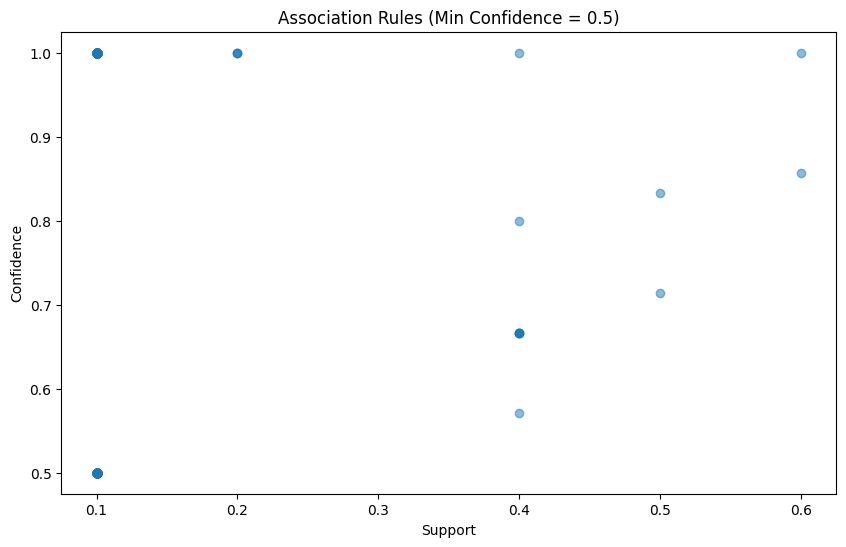

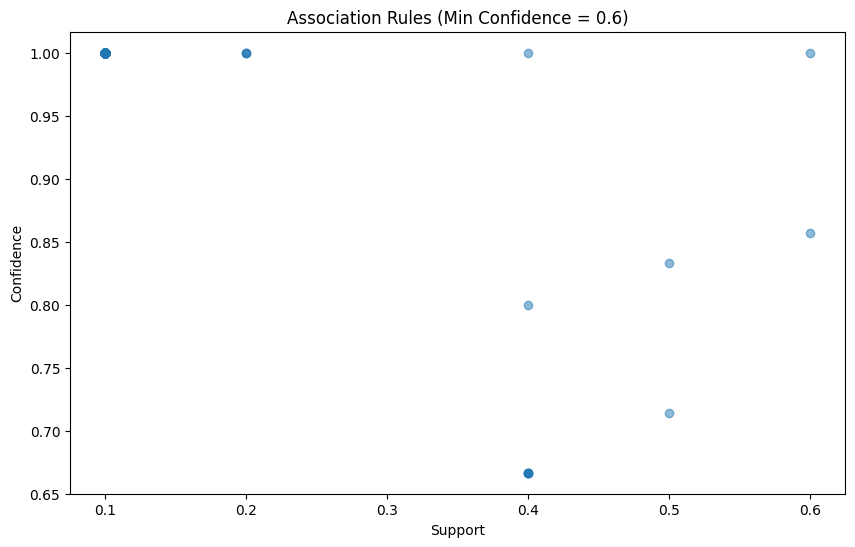

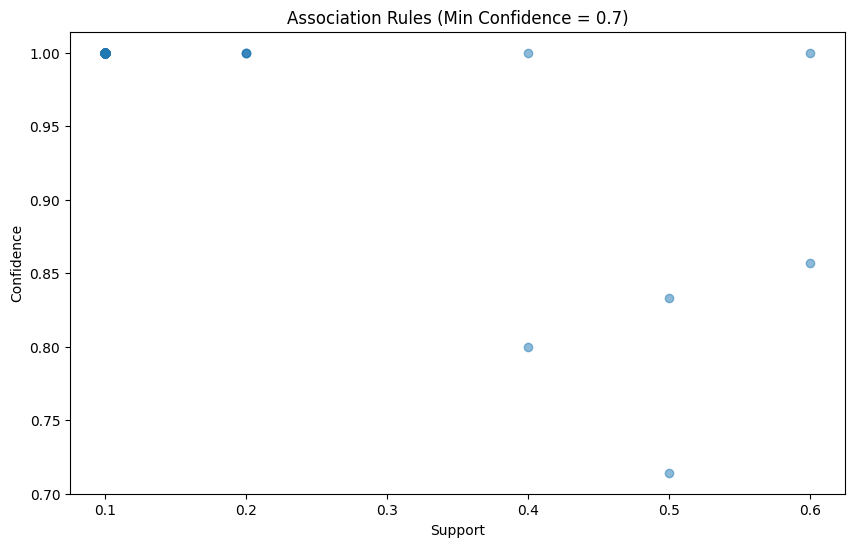

In [ ]:
for min_confidence, rules in rules_dict.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title(f'Association Rules (Min Confidence = {min_confidence})')
    plt.show()

In [ ]:
min_length_values = [1, 2, 3]
for min_length in min_length_values:
    frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
    frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= min_length)]
    print(f"Frequent Itemsets (Min Length = {min_length}):")
    print(frequent_itemsets)
    print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets (Min Length = 1):
    support                                           itemsets
0       0.1                                       (Braveheart)
1       0.7                                        (Gladiator)
2       0.2                                       (Green Mile)
3       0.2                                    (Harry Potter1)
4       0.1                                    (Harry Potter2)
5       0.1                                             (LOTR)
6       0.2                                            (LOTR1)
7       0.2                                            (LOTR2)
8       0.6                                          (Patriot)
9       0.6                                      (Sixth Sense)
10      0.1                            (Braveheart, Gladiator)
11      0.1                              (Patriot, Braveheart)
12      0.1                            (Green Mile, Gladiator)
13      0.1                                  (LOTR, Gladiator)
14      0.6        

In [ ]:
for min_confidence, rules in rules_dict.items():
    rules = rules[(rules['leverage'] > 0) & (rules['lift'] > 1)]
    print(f"Association Rules (Min Confidence = {min_confidence} - Redundant Rules Removed):")
    print(rules)
    print()

Association Rules (Min Confidence = 0.5 - Redundant Rules Removed):
                     antecedents  \
0                   (Braveheart)   
1                   (Braveheart)   
3                         (LOTR)   
4                      (Patriot)   
5                    (Gladiator)   
..                           ...   
211  (Green Mile, Harry Potter1)   
212                      (LOTR2)   
213                      (LOTR1)   
214                 (Green Mile)   
215              (Harry Potter1)   

                                         consequents  antecedent support  \
0                                        (Gladiator)                 0.1   
1                                          (Patriot)                 0.1   
3                                        (Gladiator)                 0.1   
4                                        (Gladiator)                 0.6   
5                                          (Patriot)                 0.7   
..                                         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


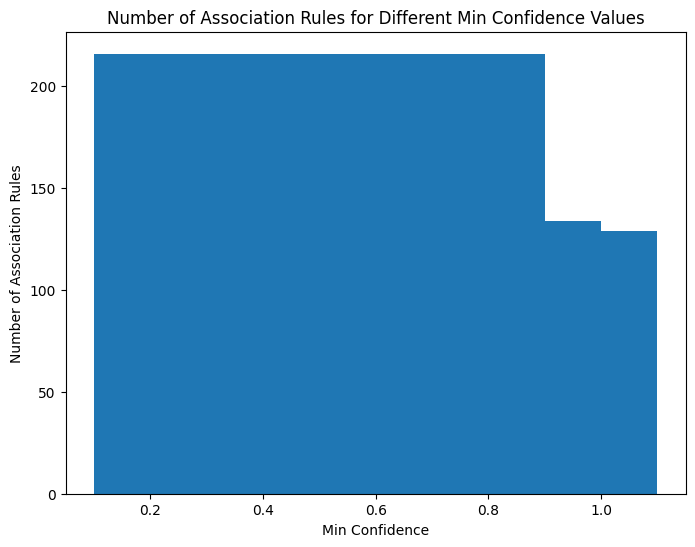

In [ ]:
num_association_rules = [len(rules) for rules in rules_dict.values()]
plt.figure(figsize=(8, 6))
plt.bar(min_confidence_values, num_association_rules)
plt.xlabel('Min Confidence')
plt.ylabel('Number of Association Rules')
plt.title('Number of Association Rules for Different Min Confidence Values')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


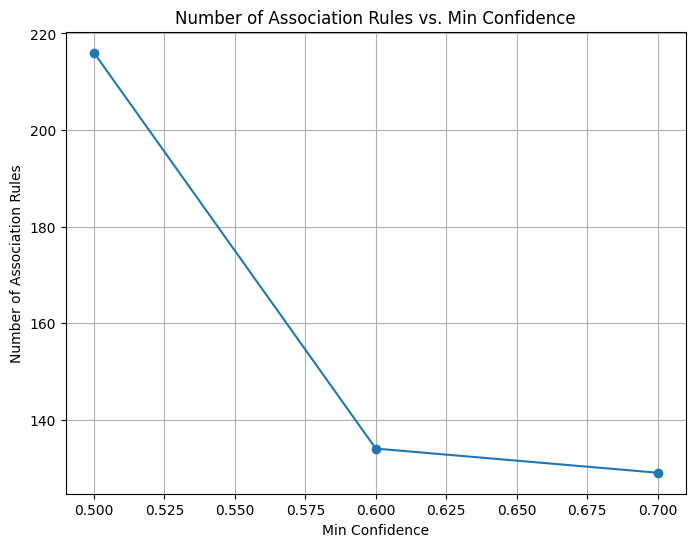

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(min_confidence_values, num_association_rules, marker='o')
plt.xlabel('Min Confidence')
plt.ylabel('Number of Association Rules')
plt.title('Number of Association Rules vs. Min Confidence')
plt.grid(True)
plt.show()